# Лаба № 2
## Геометрические преобразования изображений


### Порядок выполнения работы
1. Простейшие геометрические преобразования. Выбрать произвольное изображение. Выполнить над ним линейные и нелинейные преобразования (эвклидовы, аффинные и проективные отображения).

2. Коррекция дисторсии. Выбрать два произвольных изображения: с подушкообразной и с бочкообразной дисторсией. Выполнить коррекцию изображений.

3. «Склейка» изображений. Выбрать два изображения (снимки с фотокамеры, фрагменты сканированного изображения
и пр.), на которых имеется область пересечения. Выполнить
коррекцию второго изображения для его перевода в систему
координат первого; затем выполнить автоматическую «склейку» из двух изображений в одно

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Лекция по лабе
https://www.youtube.com/watch?v=Z904CogTWzU&list=PLAwVuvz1e-b8loeyy7PDkmMqLWIJTJNe4&index=5
https://www.youtube.com/watch?v=vdqRwerdmsg&list=PLAwVuvz1e-b8loeyy7PDkmMqLWIJTJNe4&index=6

# Может пригодиться
https://github.com/igo320345/itmo_linear_algebra/blob/main/lab3.ipynb

# Линейные преобразования

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(-0.5, 489.5, 639.5, -0.5)

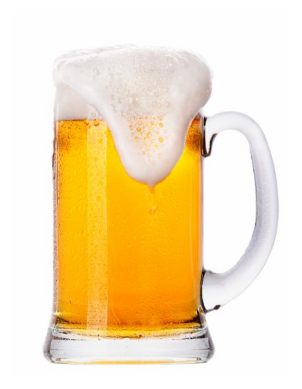

In [3]:
IMAGE_PATH = '/content/drive/MyDrive/2e80d768207cbf01.jpg'
I = cv.imread(IMAGE_PATH)
rows, cols = I.shape[0:2]
plt.imshow(cv.cvtColor(I, cv.COLOR_BGR2RGB))
plt.axis('off')

## Сдвиг изображения


(-0.5, 489.5, 639.5, -0.5)

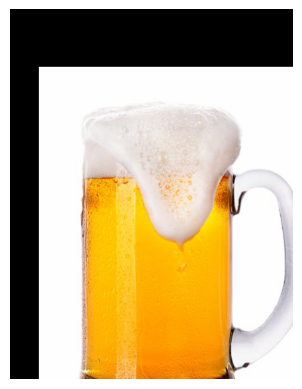

In [ ]:
C, F = 50, 100
T = np.float32([[1, 0, C], [0, 1, F]])
I_shift = cv.warpAffine(I, T, (cols, rows))
plt.imshow(cv.cvtColor(I_shift, cv.COLOR_BGR2RGB))
plt.axis('off')

## Отражение изображения

(-0.5, 489.5, 639.5, -0.5)

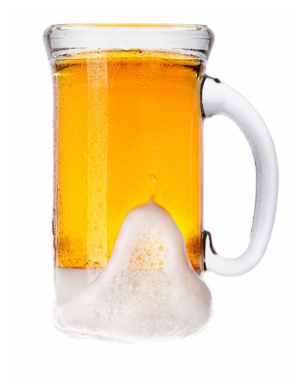

In [ ]:
T = np.float32([[1, 0, 0], [0, -1, rows - 1]])
I_reflect = cv.warpAffine(I, T, (cols, rows))
plt.imshow(cv.cvtColor(I_reflect, cv.COLOR_BGR2RGB))
plt.axis('off')

## Однородное масштабирование изображения

(-0.5, 244.5, 1279.5, -0.5)

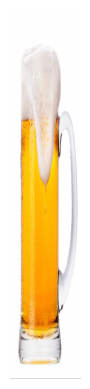

In [ ]:
scale_x, scale_y = 0.5, 2
T = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])
I_scale = cv.warpAffine(I, T, (int(cols * scale_x), int(rows * scale_y)))
plt.imshow(cv.cvtColor(I_scale, cv.COLOR_BGR2RGB))
plt.axis('off')

## Поворот изображения

(-0.5, 489.5, 639.5, -0.5)

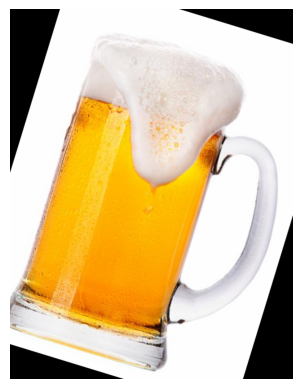

In [ ]:
# phi = 17.0 * np.pi / 180
# T = np.float32([[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0]])
phi = 17.0
T = cv.getRotationMatrix2D(((cols - 1) / 2, (rows - 1) / 2), -phi, 1)
I_rotate = cv.warpAffine(I, T, (cols, rows))
plt.imshow(cv.cvtColor(I_rotate, cv.COLOR_BGR2RGB))
plt.axis('off')

## Скос изображения

(-0.5, 489.5, 639.5, -0.5)

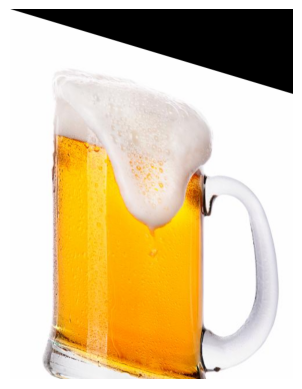

In [ ]:
s = 0.3
T = np.float32([[1, 0, 0], [s, 1, 0]])
I_bevel = cv.warpAffine(I, T, (cols, rows))
plt.imshow(cv.cvtColor(I_bevel, cv.COLOR_BGR2RGB))
plt.axis('off')

# Кусочно-линейные преобразования

## Кусочно-линейное отображение ~ Неоднородное масштабирование


(-0.5, 489.5, 639.5, -0.5)

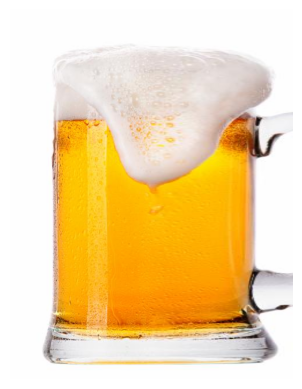

In [ ]:
stretch = 2
T = np.float32([[stretch, 0, 0], [0, 1, 0]])
I_piecewiselinear = I.copy()
I_piecewiselinear[:, int(cols / 2):, :] = cv.warpAffine(I_piecewiselinear[:, int(cols / 2):, :], T, (cols - int(cols / 2), rows))
plt.imshow(cv.cvtColor(I_piecewiselinear, cv.COLOR_BGR2RGB))
plt.axis('off')

# Нелинейные преобразования

## Синусоидальное искажение

(-0.5, 489.5, 639.5, -0.5)

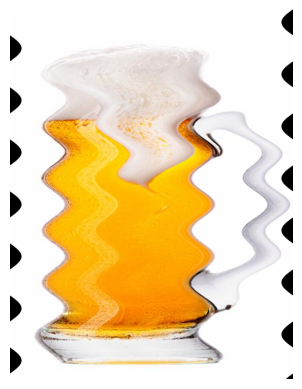

In [ ]:
u, v = np.meshgrid(np.arange(cols), np.arange(rows))
u = u + 20 * np.sin(2 * np.pi * v / 90)
I_sin = cv.remap(I, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
plt.imshow(cv.cvtColor(I_sin, cv.COLOR_BGR2RGB))
plt.axis('off')

# Проекционное преобразование

## Проекционное отображение

(-0.5, 489.5, 639.5, -0.5)

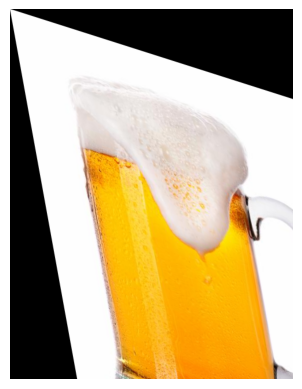

In [ ]:
T = np.float32([[1.1, 0.2, 0.00075], [0.35, 1.1, 0.0005], [0, 0, 1]])
I_projective = cv.warpPerspective(I, T, (cols, rows))
# pts_src = np.float32([[50, 461], [461, 461], [461, 50], [50, 50]])
# pts_dst = np.float32([[50, 461], [461, 440], [450, 10], [100, 50]])
# T = cv.getPerspectiveTransform(pts_src, pts_dst)
plt.imshow(cv.cvtColor(I_projective, cv.COLOR_BGR2RGB))
plt.axis('off')

# Полиномиальное преобразование

## Полиномиальное отображение

(-0.5, 489.5, 639.5, -0.5)

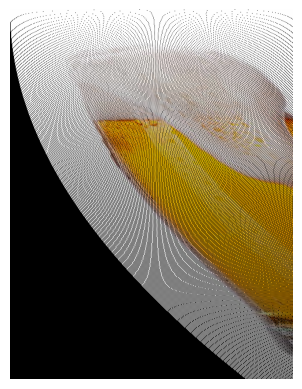

In [ ]:
T = np.array([[0, 0], [1, 0], [0, 1], [0.00001, 0], [0.002, 0], [0.001, 0]])
I_polynomial = np.zeros(I.shape , I.dtype)
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
xnew = np.round(T[0, 0] + x * T[1, 0] + y * T[2, 0] + x * x * T[3, 0] + x * y * T[4, 0] + y * y * T[5, 0]).astype(np.float32)
ynew = np.round(T[0, 1] + x * T[1, 1] + y * T[2,1] + x * x * T[3,1]+ x * y * T[4,1]+ y * y * T[5, 1]).astype(np.float32)
mask = np.logical_and( np.logical_and(xnew >= 0, xnew < cols), np.logical_and(ynew >= 0, ynew < rows))
if I.ndim == 2:
  I_polynomial[ynew[mask].astype(int), xnew[mask].astype(int)] = I[y[mask], x[mask]]
else:
  I_polynomial[ynew[mask].astype(int), xnew[mask].astype(int), :] = I[y[mask], x[mask], :]
plt.imshow(cv.cvtColor(I_polynomial, cv.COLOR_BGR2RGB))
plt.axis('off')

# Коррекция дисторсии

## Бочкообразная дисторсия

(-0.5, 489.5, 639.5, -0.5)

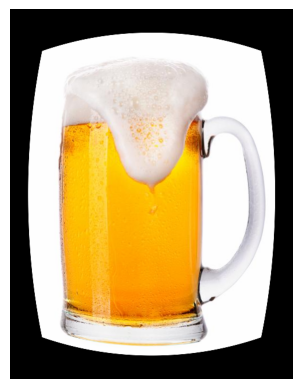

In [ ]:
xi, yi = np.meshgrid(np.arange(cols), np.arange(rows))
xmid = cols / 2.0
ymid = rows / 2.0
xi = xi - xmid
yi = yi - ymid
r, theta = cv.cartToPolar(xi / xmid, yi / ymid)
F3 = 0.1
F5 = 0.12
r = r + F3 * r ** 3 + F5 * r ** 5
u, v = cv.polarToCart(r, theta)
u = u * xmid + xmid
v = v * ymid + ymid
I_barrel = cv.remap(I, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
plt.imshow(cv.cvtColor(I_barrel, cv.COLOR_BGR2RGB))
plt.axis('off')

## Коррекция бочкообразной дисторсии

(-0.5, 489.5, 639.5, -0.5)

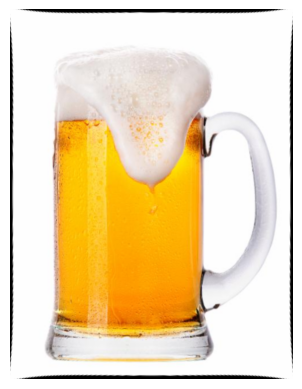

In [ ]:
xi, yi = np.meshgrid(np.arange(cols), np.arange(rows))
xmid = cols / 2.0
ymid = rows / 2.0
xi = xi - xmid
yi = yi - ymid
r, theta = cv.cartToPolar(xi / xmid, yi / ymid)
F3 = -0.115
r = r + F3 * r ** 3
u, v = cv.polarToCart(r, theta)
u = u * xmid + xmid
v = v * ymid + ymid
I_barrel_fixed = cv.remap(I_barrel, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
plt.imshow(cv.cvtColor(I_barrel_fixed, cv.COLOR_BGR2RGB))
plt.axis('off')

## Подушкообразная дисторсия

(-0.5, 489.5, 639.5, -0.5)

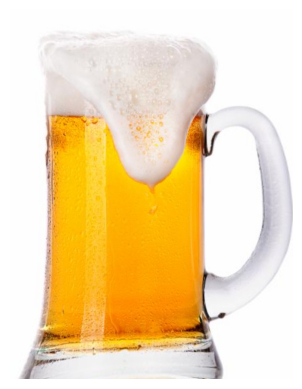

In [ ]:
xi, yi = np.meshgrid(np.arange(cols), np.arange(rows))
xmid = cols / 2.0
ymid = rows / 2.0
xi = xi - xmid
yi = yi - ymid
r, theta = cv.cartToPolar(xi / xmid, yi / ymid)
F3 = -0.1
r = r + F3 * r ** 3
u, v = cv.polarToCart(r, theta)
u = u * xmid + xmid
v = v * ymid + ymid
I_pincushion = cv.remap(I, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
plt.imshow(cv.cvtColor(I_pincushion, cv.COLOR_BGR2RGB))
plt.axis('off')

## Коррекция подушкообразной дисторсии

(-0.5, 489.5, 639.5, -0.5)

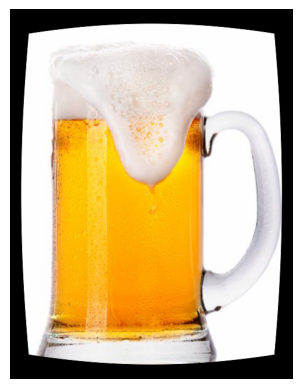

In [ ]:
xi, yi = np.meshgrid(np.arange(cols), np.arange(rows))
xmid = cols / 2.0
ymid = rows / 2.0
xi = xi - xmid
yi = yi - ymid
r, theta = cv.cartToPolar(xi / xmid, yi / ymid)
F3 = 0.1
F5 = 0.001
r = r + F3 * r ** 3 + F5 * r ** 5
u, v = cv.polarToCart(r, theta)
u = u * xmid + xmid
v = v * ymid + ymid
I_pincushion_fixed = cv.remap(I_pincushion, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
plt.imshow(cv.cvtColor(I_pincushion_fixed, cv.COLOR_BGR2RGB))
plt.axis('off')

# «Склейка» изображений

In [30]:
topPart = cv.imread('/content/drive/MyDrive/top.jpg', cv.IMREAD_COLOR)
botPart = cv.imread('/content/drive/MyDrive/bot.jpg', cv.IMREAD_COLOR)

In [36]:
templ_size = 10
templ = topPart[-templ_size:, :botPart.shape[1], :]
res = cv.matchTemplate(botPart, templ, cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
result_img = np.zeros((topPart.shape[0] + botPart.shape[0] - max_loc[1] - templ_size , topPart.shape[1],topPart.shape[2]), dtype = np.uint8)
result_img[0:topPart.shape[0], :, :] = topPart
result_img[topPart.shape[0]:, :botPart.shape[1], :] = botPart[max_loc[1] + templ_size:, :, :]

(-0.5, 1199.5, 797.5, -0.5)

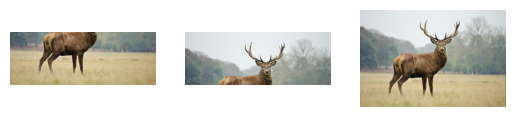

In [37]:
fig, axs = plt.subplots(1, 3)
plt.sca(axs[0])
plt.imshow(cv.cvtColor(botPart, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.sca(axs[1])
plt.imshow(cv.cvtColor(topPart, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.sca(axs[2])
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.axis('off')